# HW1Eigendigits
- Author: Yuege Xie (EID:yx4256)
- Python version: Python 3
- CS 391L Machine Learning HW1

In [105]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy.linalg as la
np.random.seed(1023)

# check the python version
from platform import python_version
print("Current python version is {}".format(python_version()))
%matplotlib inline

Current python version is 3.6.9


In [44]:
def preprocess(data):
    data = data.reshape((data.shape[0], data.shape[1]*data.shape[2]))
    data = data/255.0
    print("Shape after flattening: {}".format(data.shape))
    return data

In [45]:
# load and preprocess data
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')
x_train = preprocess(x_train)
x_test  = preprocess(x_test)

Shape after flattening: (60000, 784)
Shape after flattening: (10000, 784)


In [101]:
def image_disp(data, label, row, col, filename, label_dis=False):

    for i in range(row*col):
        image = data[i].reshape(28, 28)  
        plt.subplot(row, col, i+1)         
        plt.imshow(image, cmap='gray') 
        plt.axis('off')
        if label_dis == 'label':
            plt.title('label = {}'.format(label[i]))
        elif label_dis == 'order':
            plt.title(label[i])
    plt.tight_layout()
    plt.savefig('./'+filename+'.pdf')
    plt.show()

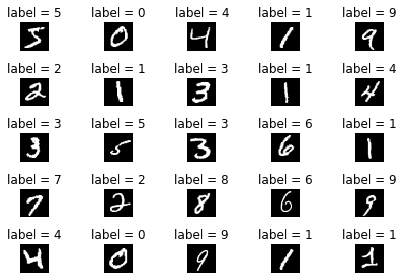

In [102]:
# show examples of the images and check the labels
image_disp(x_train, y_train, 5, 5, "train_img", label_dis='label')

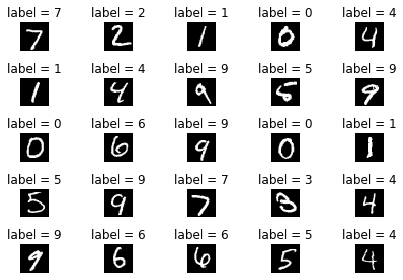

In [103]:
image_disp(x_test, y_test, 5, 5, "test_img", label_dis='label')

In [93]:
def sample_train(x_train, y_train, num):
    """
    Randomly sample #num training data 
    Usage: data, label = sample_train(x_train, y_train, 1000)
    """
    idx = np.random.randint(0, len(y_train), num)
    return x_train[idx,:], y_train[idx]

In [132]:
def get_eig(data):
    
    mean = np.mean(data, axis=0) # calculate mean vector
    data = data - mean
    cov = data.T.dot(data)
    eig_val, eig_vec = la.eigh(cov)
    
    # sort eignvalues and corresponding eigenvectors
    idx = eig_val.argsort()[::-1]   
    eig_val = eig_val[idx]
    eig_vec = eig_vec[:,idx]
    
    return eig_val, eig_vec

In [135]:
def transform_data(train_data, test_data, V, dim):
    return train_data.dot(V[:,:dim]), test_data.dot(V[:,:dim])

In [145]:
def classfication_knn(k, train, label, test, y_test):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train, label)
    pred = neigh.predict(test)
    acc = np.sum(pred == y_test)/10000 * 100
    print("m = {}, dim = {}, k = {}: accuracy = {}%".format(train.shape[0], train.shape[1], k, acc))
    
    return acc

In [156]:
def reconstruction(data, V, label, m, d):
    recon = data.dot(V.T)
    image_disp(recon, label, 5, 5, 'recon-m{}-d{}'.format(m, d), label_dis='label')

Top 25 eigen digits of m = 10000


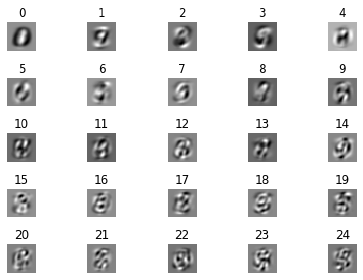

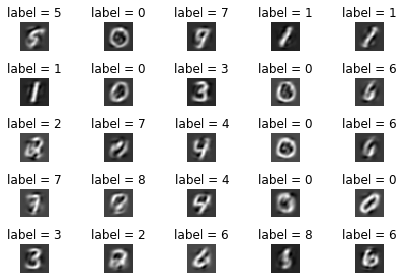

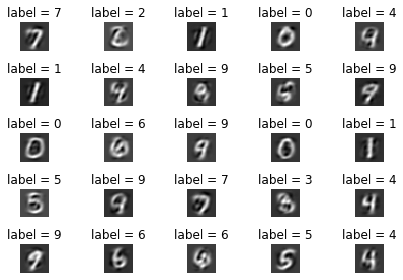

m = 10000, dim = 20, k = 1: accuracy = 94.42%
m = 10000, dim = 20, k = 3: accuracy = 94.91000000000001%
m = 10000, dim = 20, k = 5: accuracy = 95.11%
m = 10000, dim = 20, k = 7: accuracy = 94.96%
m = 10000, dim = 20, k = 9: accuracy = 95.03%


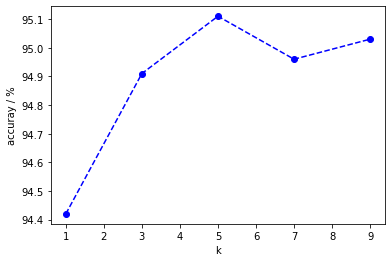

In [163]:
#=====compare different k=====#
m = 10000
dim = 20
kk  = [1,3,5,7,9] #set values of k
acc = [] #record accuracy

train_data, label = sample_train(x_train, y_train, m) # sample training data
eig_val, V = get_eig(train_data) #get principal components
print("Top 25 eigen digits of m = {}".format(m))
image_disp(V.T, range(len(eig_val)), 5, 5, "eig_digit_{}".format(m), label_dis='order') #display eigen digits
train, test = transform_data(train_data, x_test, V, dim=dim) #project training and test data on eigenspace
reconstruction(train[:25,:], V[:,:dim], label[:25], m, dim)
reconstruction(test[:25,:], V[:,:dim], y_test[:25], m, dim)

for k in kk:
    acc.append(classfication_knn(k, train, label, test, y_test))

plt.plot(kk, acc, 'bo--')
plt.xlabel('k')
plt.ylabel('accuray / %')
plt.savefig("diffk-m{}-d{}.pdf".format(m, dim))
plt.show()

Top 25 eigen digits of m = 1000


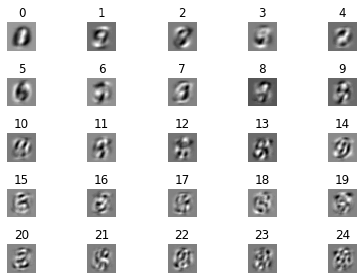

m = 1000, dim = 50, k = 3: accuracy = 88.68%
Top 25 eigen digits of m = 2000


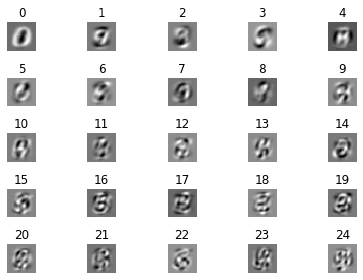

m = 2000, dim = 50, k = 3: accuracy = 91.81%
Top 25 eigen digits of m = 5000


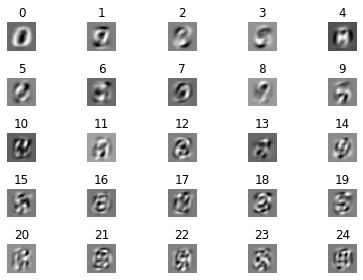

m = 5000, dim = 50, k = 3: accuracy = 94.42%
Top 25 eigen digits of m = 10000


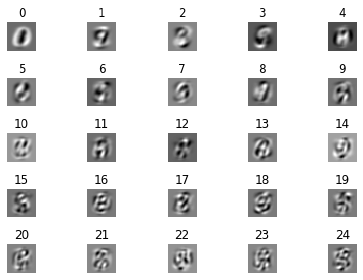

m = 10000, dim = 50, k = 3: accuracy = 95.78%
Top 25 eigen digits of m = 20000


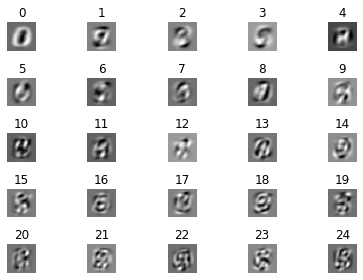

m = 20000, dim = 50, k = 3: accuracy = 96.11%
Top 25 eigen digits of m = 50000


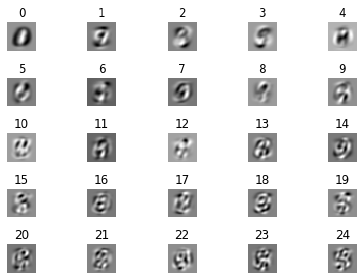

m = 50000, dim = 50, k = 3: accuracy = 96.74000000000001%
Top 25 eigen digits of m = 60000


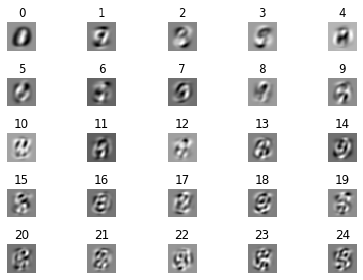

m = 60000, dim = 50, k = 3: accuracy = 97.52%


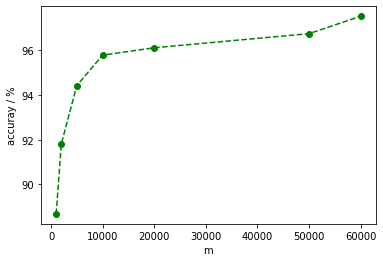

In [155]:
#=====compare different m=====#
mm = [1000, 2000, 5000, 10000, 20000, 50000, 60000]
dim = 50
k  = 3 #set values of k
acc = [] #record accuracy

for m in mm:

    if m==60000:
        train_data, label = x_train, y_train
    else: 
        train_data, label = sample_train(x_train, y_train, m) # sample training data
        

    eig_val, V = get_eig(train_data) #get principal components
    print("Top 25 eigen digits of m = {}".format(m))
    image_disp(V.T, range(len(eig_val)), 5, 5, "eig_digit_{}".format(m), label_dis='order') #display eigen digits
    train, test = transform_data(train_data, x_test, V, dim=dim) #project training and test data on eigenspace
    
    acc.append(classfication_knn(k, train, label, test, y_test))

plt.plot(mm, acc, 'go--')
plt.xlabel('m')
plt.ylabel('accuray / %')
plt.savefig("diffm-k{}-d{}.pdf".format(k, dim))
plt.show()

Top 25 eigen digits of m = 10000


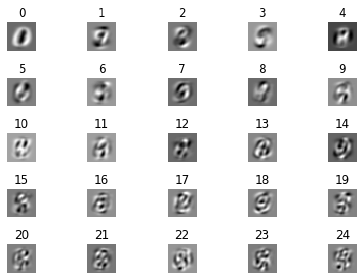

m = 10000, dim = 10, k = 3: accuracy = 90.03%
m = 10000, dim = 20, k = 3: accuracy = 94.99%
m = 10000, dim = 50, k = 3: accuracy = 95.76%
m = 10000, dim = 100, k = 3: accuracy = 95.37%
m = 10000, dim = 200, k = 3: accuracy = 95.04%
m = 10000, dim = 500, k = 3: accuracy = 94.82000000000001%
m = 10000, dim = 784, k = 3: accuracy = 94.81%


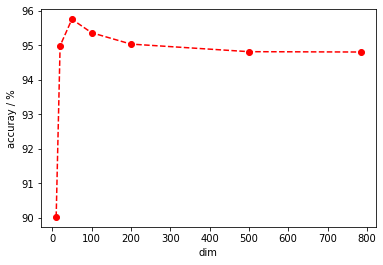

In [154]:
#=====compare different dim=====#
m = 10000
dd = [10, 20, 50, 100, 200, 500, 784]
k  = 3 #set values of k
acc = [] #record accuracy

train_data, label = sample_train(x_train, y_train, m) # sample training data
eig_val, V = get_eig(train_data) #get principal components
print("Top 25 eigen digits of m = {}".format(m))
image_disp(V.T, range(len(eig_val)), 5, 5, "eig_digit_{}".format(m), label_dis='order') #display eigen digits

for dim in dd:
    train, test = transform_data(train_data, x_test, V, dim=dim) #project training and test data on eigenspace
    acc.append(classfication_knn(k, train, label, test, y_test))

plt.plot(dd, acc, 'ro--')
plt.xlabel('dim')
plt.ylabel('accuray / %')
plt.savefig("diffd-m{}-k{}.pdf".format(m, k))
plt.show()